In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=60a60fae55e64ee84d7ce1318944f47f567b2ed9d7de8034d985b383ab6e34a5
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

In [3]:
from pyspark.sql.functions import col,count,when

In [4]:
spark = SparkSession.builder.appName('Weather_Sense').getOrCreate()

Loading the Data and Checking dataset Details

In [5]:
df = spark.read.csv('/content/drive/MyDrive/sample_weather1.csv',header=True,inferSchema=True)

In [ ]:
print(df.count())

49999167


In [ ]:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- DATE: string (nullable = true)
 |-- TMAX: integer (nullable = true)
 |-- TMIN: integer (nullable = true)
 |-- EVAP: integer (nullable = true)
 |-- PRCP: integer (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Elevation: double (nullable = true)



In [ ]:
df.describe().show()

+-------+-----------+--------+------------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+
|summary|         ID|    DATE|              TMAX|              TMIN|             EVAP|              PRCP|         Latitude|         Longitude|        Elevation|
+-------+-----------+--------+------------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+
|  count|   49999167|49999167|          25542032|          25527128|           546687|          45443141|         49999167|          49999167|         49999167|
|   mean|       NULL|    NULL|174.17074448109688|47.505450397710234|66.38716486764821|27.275697447938292| 39.0033010357705| -98.8187258163464|640.0434025149802|
| stddev|       NULL|    NULL|129.05832845703418|132.50994557212508|358.8700674086595| 86.69006261942954|6.343381470032414|17.212575952069248|718.7636133046474|
|    min|US009052008|1/1/1992|    

In [ ]:
df.show(5000)

+-----------+----------+----+----+----+----+--------+---------+---------+
|         ID|      DATE|TMAX|TMIN|EVAP|PRCP|Latitude|Longitude|Elevation|
+-----------+----------+----+----+----+----+--------+---------+---------+
|US1IDAD0020|  1/8/2017|NULL|NULL|NULL|  43| 43.5772|-116.1565|    834.2|
|US1WAOK0011| 2/24/2014|NULL|NULL|NULL|  43| 48.4946| -120.248|    872.6|
|US1ORCK0004|10/22/2017|NULL|NULL|NULL|  43| 44.3224| -120.912|    896.1|
|US1KSLG0005|  9/2/2006|NULL|NULL|NULL|  43| 39.1274| -100.853|    939.1|
|US1MTYS0011|  5/9/2015|NULL|NULL|NULL|  43| 45.7148|-108.6473|    983.0|
|USC00249054|  4/1/2011|NULL|NULL|NULL|  43| 46.9222|-108.5628|    989.1|
|US1NMSJ0019| 2/23/2008|NULL|NULL|NULL|  43| 36.7375|-108.2478|   1606.3|
|US1NMCT0009|  1/8/2016|NULL|NULL|NULL|  43| 34.4349|-108.4088|   2242.1|
|US1COHF0037|  8/2/2015|NULL|NULL|NULL|  43| 37.4631|-104.9038|   2318.3|
|USC00212576| 1/26/2013|-128|-311|NULL|  43| 47.6431| -92.2264|    434.3|
|USC00505644| 12/9/2011| -78|-111|NULL

General Data Cleaning

In [6]:
df1 = df.drop_duplicates()

In [ ]:
print(df1.count())

49999167


In [ ]:
null_values = df1.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])

In [ ]:
null_values.show()

+---+----+--------+--------+--------+-------+--------+---------+---------+
| ID|DATE|    TMAX|    TMIN|    EVAP|   PRCP|Latitude|Longitude|Elevation|
+---+----+--------+--------+--------+-------+--------+---------+---------+
|  0|   0|24457135|24472039|49452480|4556026|       0|        0|        0|
+---+----+--------+--------+--------+-------+--------+---------+---------+



In [7]:
df2 = df1.dropna()

In [ ]:
print(df2.count())

535270


Exploratory Data Analysis using Matplotlib and Seaborn

In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plot_df = df2.toPandas()
plot_df1 = plot_df.sample(n=10000)
plot_df = plot_df.sample(n=100)

In [ ]:
print(plot_df.columns)

Index(['ID', 'DATE', 'TMAX', 'TMIN', 'EVAP', 'PRCP', 'Latitude', 'Longitude',
       'Elevation'],
      dtype='object')


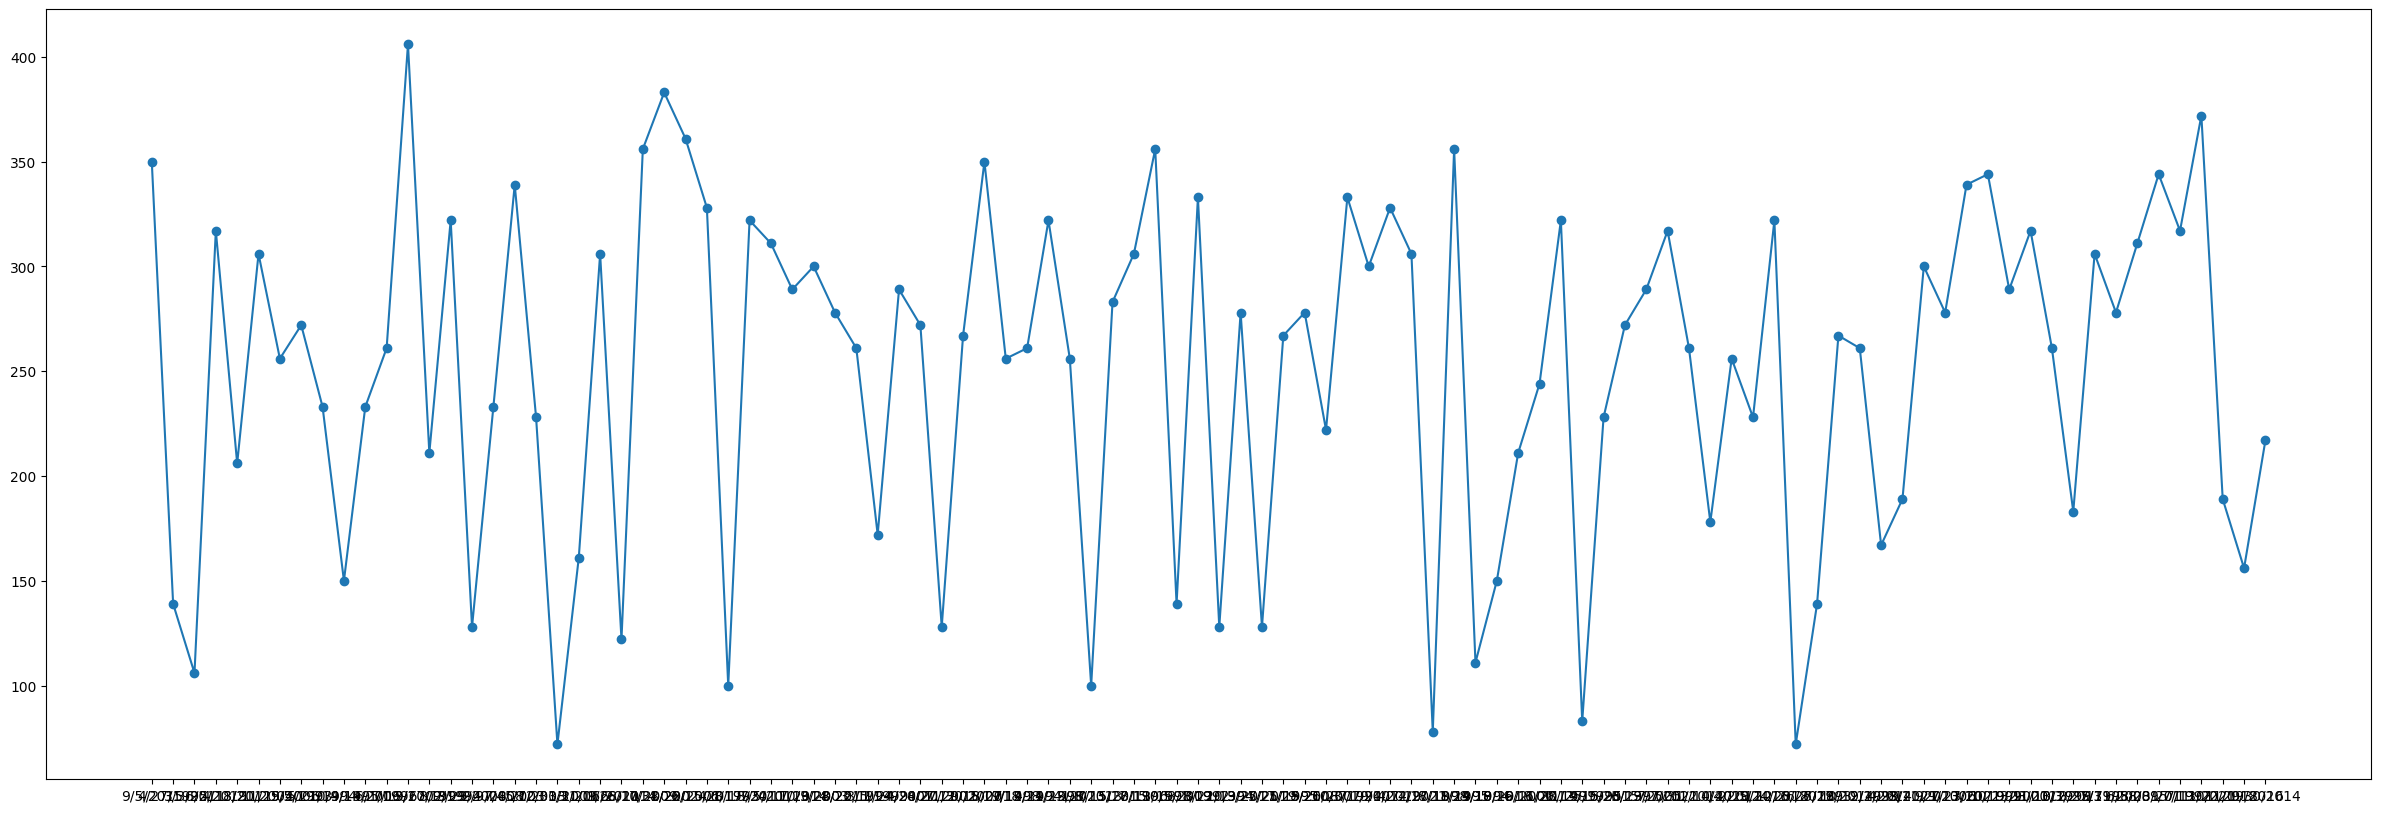

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(plot_df['DATE'],plot_df['TMAX'],marker='o')
plt.show()

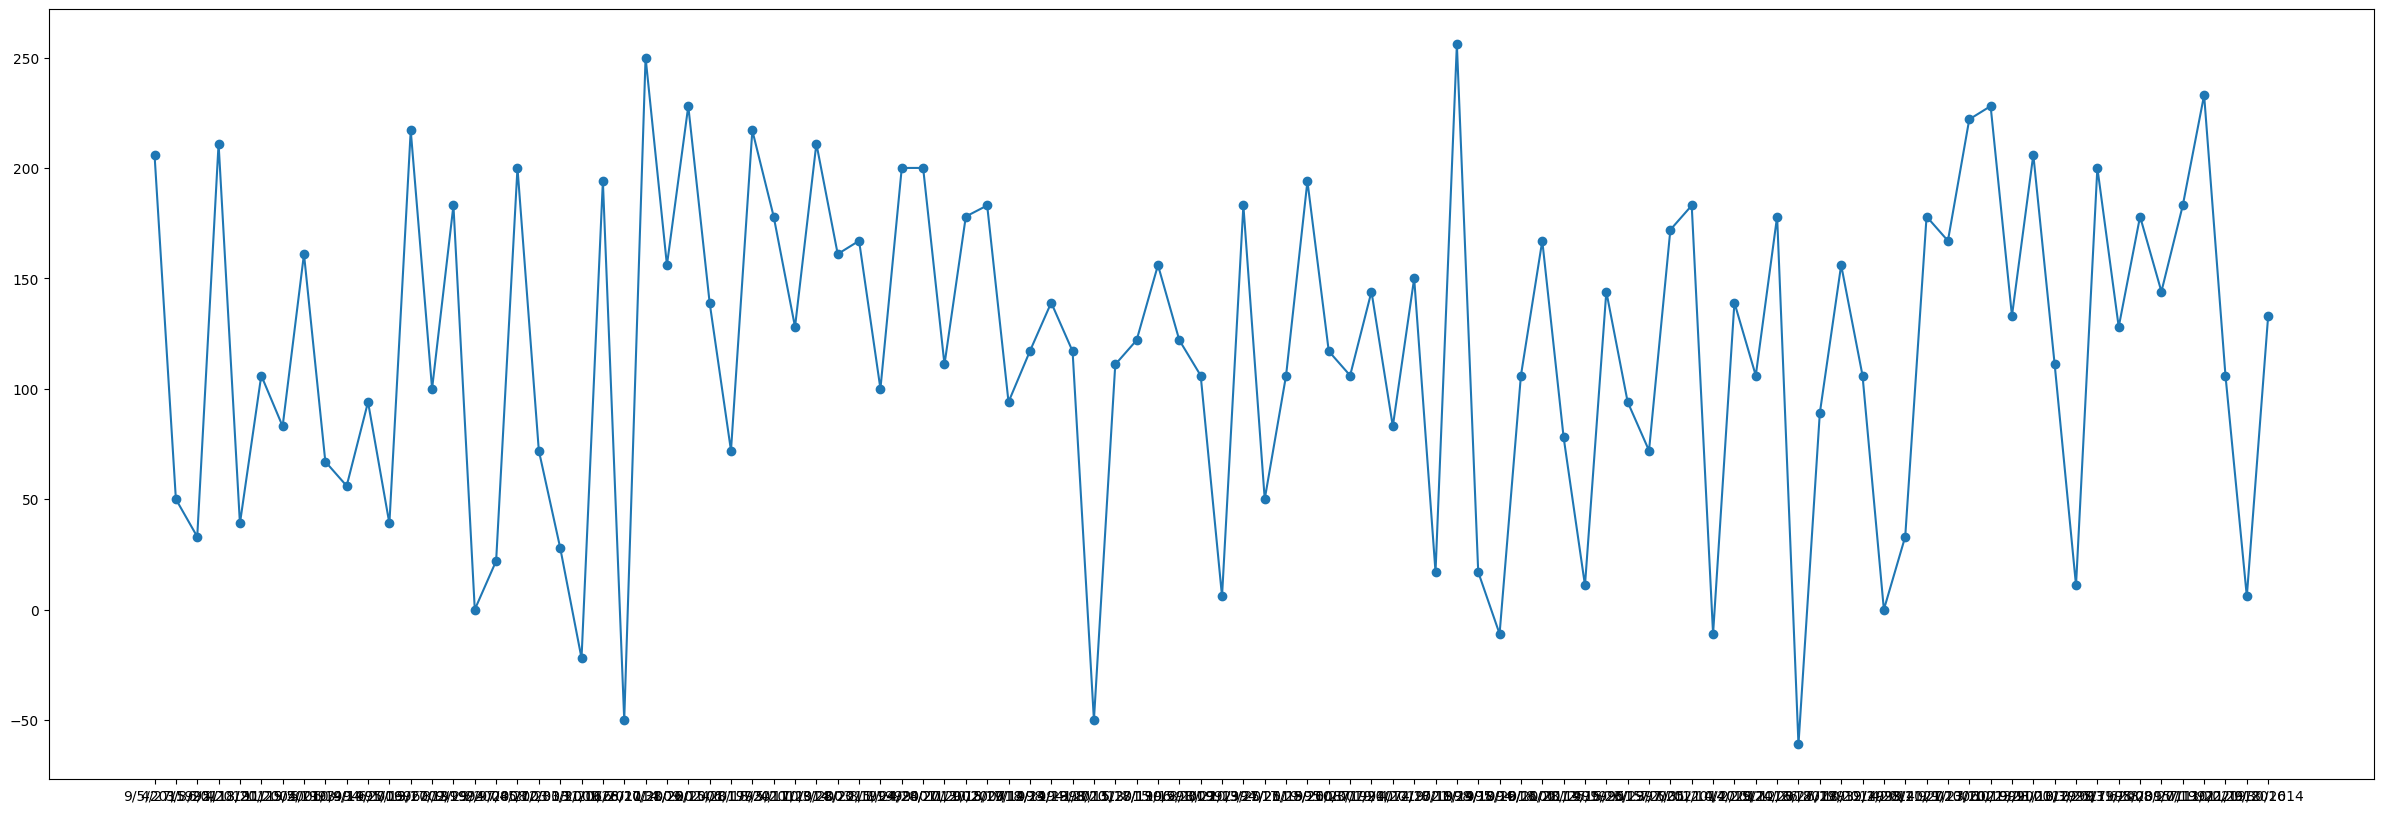

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(plot_df['DATE'],plot_df['TMIN'],marker='o')
plt.show()

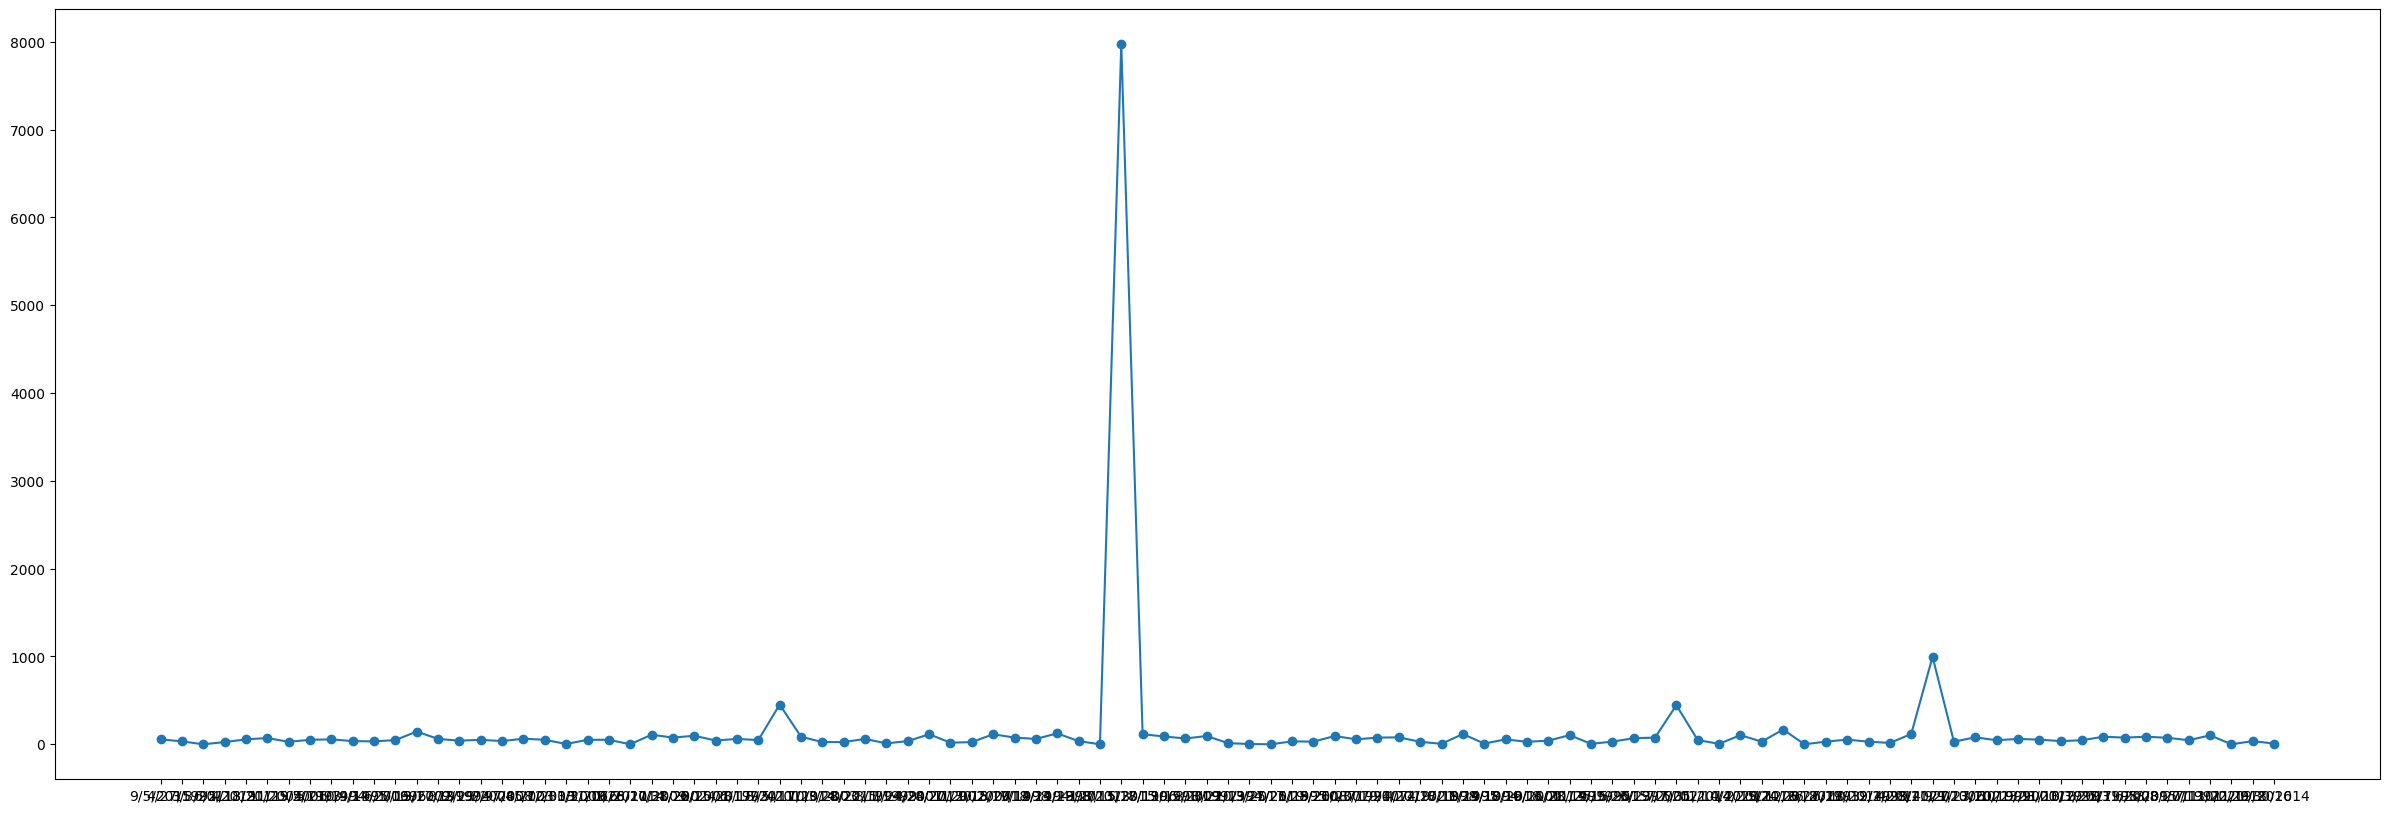

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(plot_df['DATE'],plot_df['EVAP'],marker='o')
plt.show()

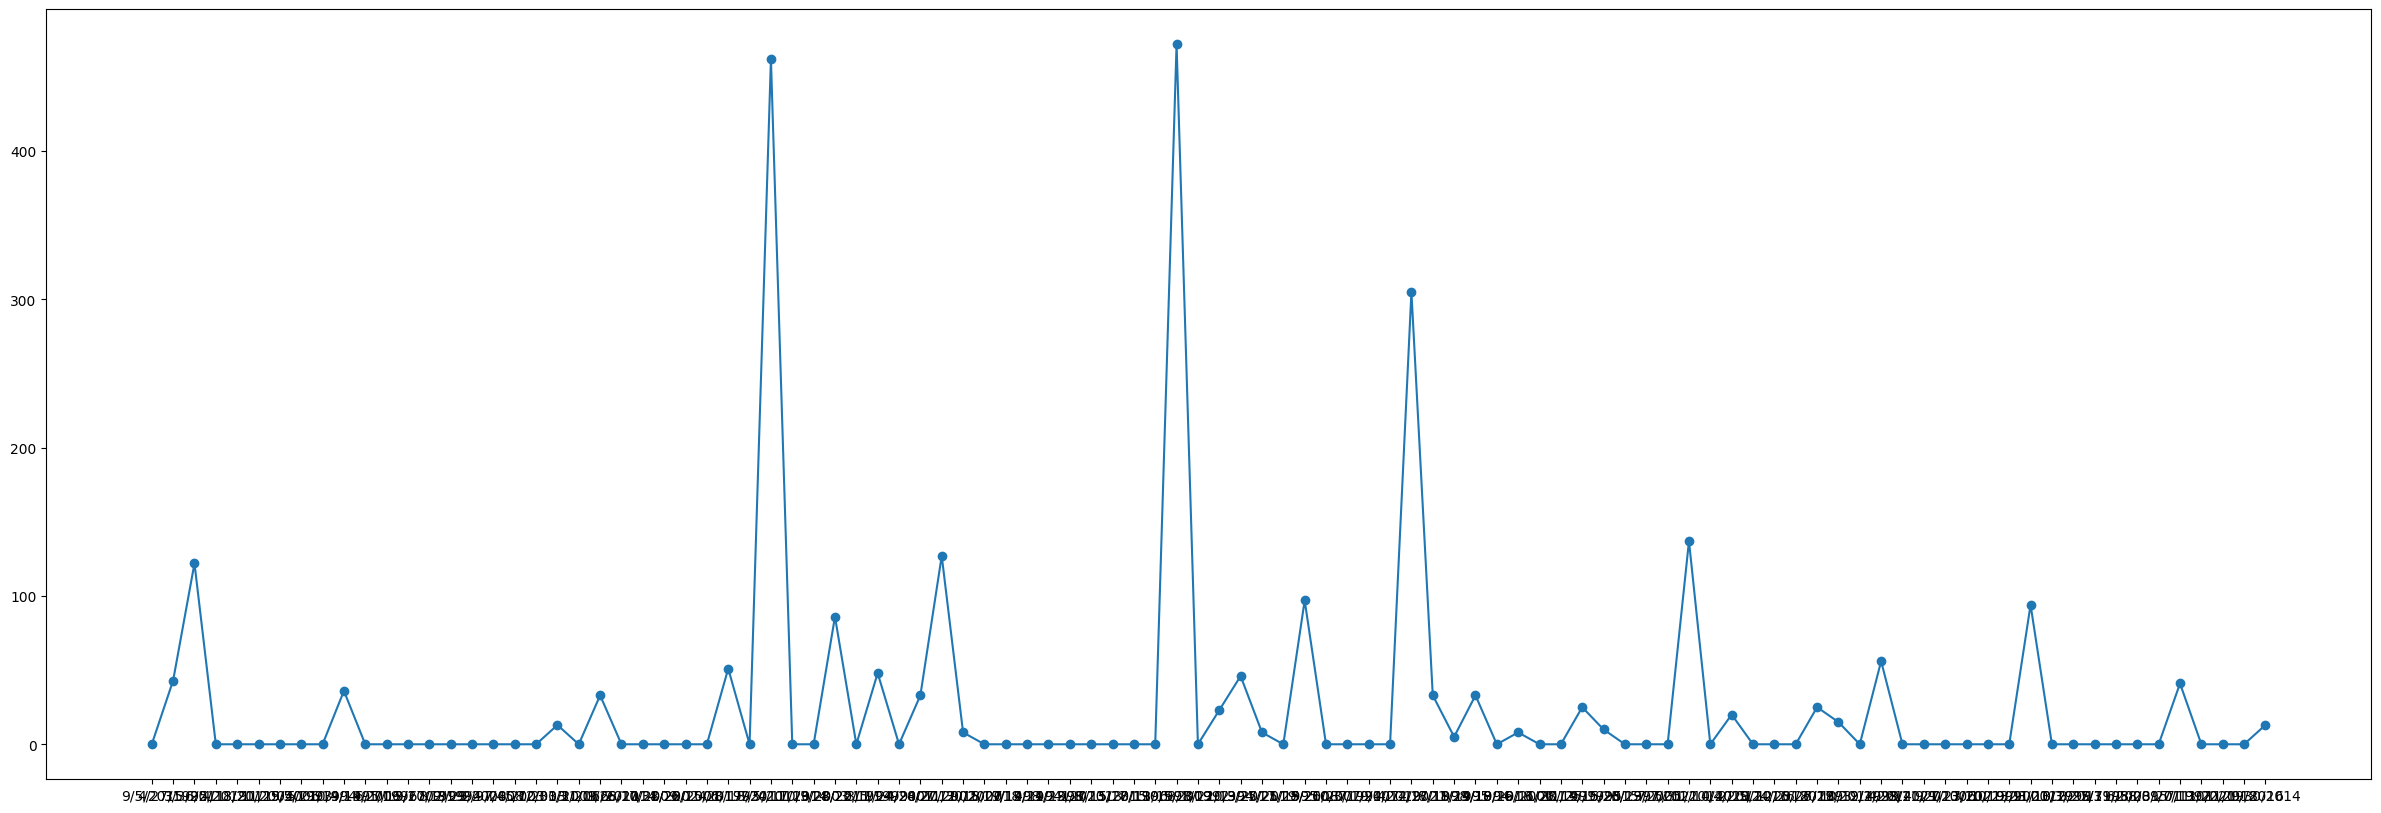

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(plot_df['DATE'],plot_df['PRCP'],marker='o')
plt.show()

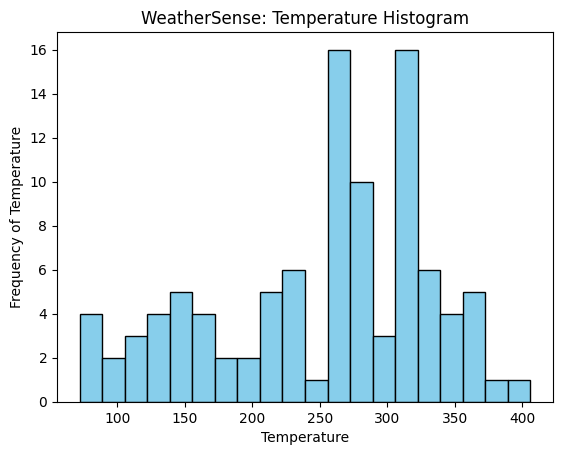

In [ ]:
plt.hist(plot_df['TMAX'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency of Temperature')
plt.title('WeatherSense: Temperature Histogram')
plt.show()

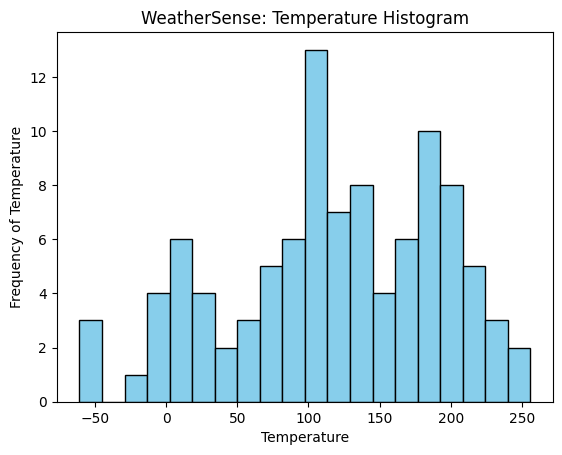

In [ ]:
plt.hist(plot_df['TMIN'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency of Temperature')
plt.title('WeatherSense: Temperature Histogram')
plt.show()

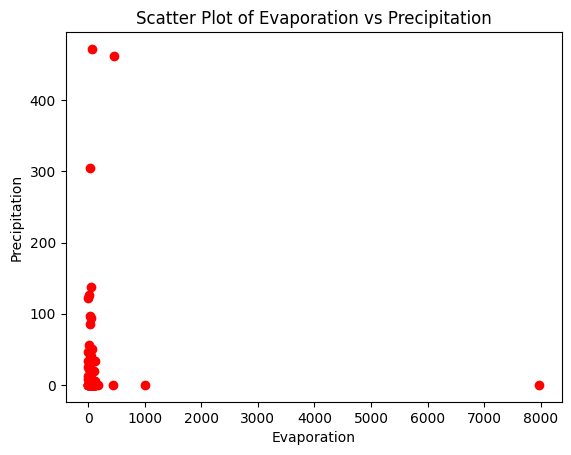

In [ ]:
plt.scatter(plot_df['EVAP'], plot_df['PRCP'], color='red')
plt.title('Scatter Plot of Evaporation vs Precipitation')
plt.xlabel('Evaporation')
plt.ylabel('Precipitation')
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
plot_df2 = plot_df1.iloc[:,2:6]

In [ ]:
corr = plot_df2.corr()

In [ ]:
corr

,TMAX,TMIN,EVAP,PRCP
TMAX,1.000000,0.801385,0.125819,-0.080933
TMIN,0.801385,1.000000,0.076634,0.059535
EVAP,0.125819,0.076634,1.000000,-0.021959
PRCP,-0.080933,0.059535,-0.021959,1.000000


<Axes: >

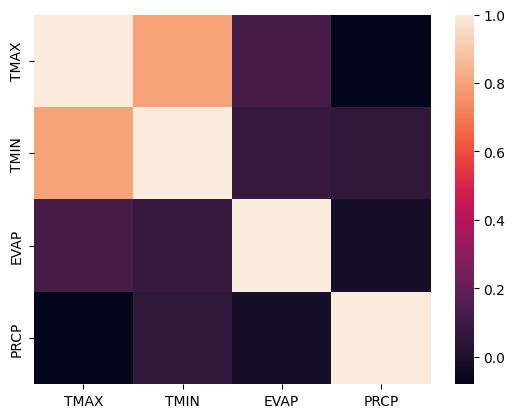

In [ ]:
sns.heatmap(corr)

Machine Learing Predictions

Predicting Precipitation Chance

In [8]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
print(plot_df1.columns)

Index(['ID', 'DATE', 'TMAX', 'TMIN', 'EVAP', 'PRCP', 'Latitude', 'Longitude',
       'Elevation'],
      dtype='object')


In [9]:
ml_df = df2.limit(50000)

In [10]:
ml_df = ml_df.drop('ID','DATE')

In [ ]:
print(ml_df.columns)

['TMAX', 'TMIN', 'EVAP', 'PRCP', 'Latitude', 'Longitude', 'Elevation']


In [ ]:
columns_used = ['TMAX', 'TMIN', 'EVAP', 'Latitude', 'Longitude', 'Elevation']
target_col = 'PRCP'

In [ ]:
assembler = VectorAssembler(inputCols=columns_used,outputCol='features')

In [ ]:
assembled_data = assembler.transform(ml_df)

In [ ]:
ml_final = assembled_data.select('features','PRCP')

In [11]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
lr = LinearRegression(featuresCol='features',labelCol='PRCP')

In [ ]:
train_data,test_data=assembled_data.randomSplit([0.8,0.2],seed=42)

In [ ]:
print(train_data.columns)

['TMAX', 'TMIN', 'EVAP', 'PRCP', 'Latitude', 'Longitude', 'Elevation', 'features']


In [ ]:
mlr_model = lr.fit(train_data)

In [ ]:
print("Coefficients:", mlr_model.coefficients)
print("Intercept:", mlr_model.intercept)

Coefficients: [-0.30849631969354985,0.30131894156348754,0.0055811421115196345,0.35243550324657896,0.23114307284141064,0.0023862487094491167]
Intercept: 72.76864439585476


In [ ]:
predictions = mlr_model.transform(test_data)

In [ ]:
predictions.show()

+----+----+----+----+--------+---------+---------+--------------------+------------------+
|TMAX|TMIN|EVAP|PRCP|Latitude|Longitude|Elevation|            features|        prediction|
+----+----+----+----+--------+---------+---------+--------------------+------------------+
|-139|  61|  23|   0| 31.9611| -96.6881|    138.4|[-139.0,61.0,23.0...|123.40415318020028|
|-106|-217|   0|   0| 45.9228|-108.2453|    924.8|[-106.0,-217.0,0....| 33.45452063644444|
| -89|-222|   0|   0|  40.185|-105.8667|   2526.2|[-89.0,-222.0,0.0...| 29.05241965968083|
| -78|-117|   0|   0| 39.2475| -96.5994|    322.5|[-78.0,-117.0,0.0...| 53.85053664085449|
| -67|-106|  33|   0| 38.0633|  -102.93|   1161.6|[-67.0,-106.0,33....| 54.07743600332827|
| -61|-100|   0|   0| 44.9892| -70.6722|    542.5|[-61.0,-100.0,0.0...| 62.26996753588695|
| -50|-211|  20|   0| 37.1503|-104.5567|   1923.3|[-50.0,-211.0,20....|18.241786447854132|
| -44|-133|  33|   0| 36.2403|-106.4278|   1944.6|[-44.0,-133.0,33....| 39.26385980505793|

In [ ]:
evaluator1 = RegressionEvaluator(labelCol='PRCP',predictionCol='prediction',metricName='r2')
r2 = evaluator1.evaluate(predictions)
print('The R-squared(R^2) value for determining chance of precipitation is:', r2)

The R-squared(R^2) value for determining chance of precipitation is: 0.05610035705194316


In [ ]:
evaluator2 = RegressionEvaluator(labelCol='PRCP',predictionCol='prediction',metricName='rmse')
rmse = evaluator2.evaluate(predictions)
print('The Root Mean Squared(RMSE) value for determining chance of precipitation is:', rmse)

The Root Mean Squared(RMSE) value for determining chance of precipitation is: 64.64382082322031


In [ ]:
print('Hence the MLR model predicts Rain with Root Mean Squared error of +- 64 which is acceptable',rmse)

Hence the MLR model predicts Rain with Root Mean Squared error of +- 64 which is acceptable 64.64382082322031


Predicting Temperature

In [ ]:
print(ml_df.columns)

['TMAX', 'TMIN', 'EVAP', 'PRCP', 'Latitude', 'Longitude', 'Elevation']


In [ ]:
columns_used2 = ['TMIN','Latitude','Longitude','Elevation']
target_col2 = 'TMAX'

In [ ]:
assembler2 = VectorAssembler(inputCols=columns_used2,outputCol='features')

In [ ]:
output = assembler2.transform(ml_df)

In [ ]:
train_data1,test_data1 = output.randomSplit([0.7,0.3],seed=42)

In [ ]:
lr2 = LinearRegression(featuresCol='features',labelCol='TMAX')

In [ ]:
mlr_model2 = lr2.fit(train_data1)

In [ ]:
print("Coefficients:", mlr_model2.coefficients)
print("Intercept:", mlr_model2.intercept)

Coefficients: [0.873045230782109,-0.008849538470602863,-0.30628099429423866,0.026390698651400892]
Intercept: 112.81967781817384


In [ ]:
predictions2 = mlr_model2.transform(test_data1)

In [ ]:
predictions2.show()

+----+----+----+----+--------+---------+---------+--------------------+-------------------+
|TMAX|TMIN|EVAP|PRCP|Latitude|Longitude|Elevation|            features|         prediction|
+----+----+----+----+--------+---------+---------+--------------------+-------------------+
|-139|  61|  23|   0| 31.9611| -96.6881|    138.4|[61.0,31.9611,-96...| 199.05879600964437|
|-106|-217|   0|   0| 45.9228|-108.2453|    924.8|[-217.0,45.9228,-...| -19.47793662232793|
| -89|-222|   0|   0|  40.185|-105.8667|   2526.2|[-222.0,40.185,-1...|   17.7411589529233|
| -89|-194|  20|  15| 38.0633|  -102.93|   1161.6|[-194.0,38.0633,-...|  5.292998704949852|
| -78|-117|   0|   0| 39.2475| -96.5994|    322.5|[-117.0,39.2475,-...| 48.423624150845754|
| -72|-200|   0|   0| 43.5492| -71.4644|    152.4|[-200.0,43.5492,-...| -36.26462869589726|
| -67|-211|   0|   0| 44.9892| -70.6722|    542.5|[-211.0,44.9892,-...|  -35.8284938296665|
| -67|-106|  33|   0| 38.0633|  -102.93|   1161.6|[-106.0,38.0633,-...|  82.1209

In [ ]:
evaluator3 = RegressionEvaluator(labelCol='TMAX',predictionCol='prediction',metricName='r2')
r2 = evaluator3.evaluate(predictions2)
print('The R-squared(R^2) value for determining chance of precipitation is:', r2)

The R-squared(R^2) value for determining chance of precipitation is: 0.6717380150562469


In [ ]:
evaluator4 = RegressionEvaluator(labelCol='TMAX',predictionCol='prediction',metricName='rmse')
rmse = evaluator4.evaluate(predictions2)
print('The Root Mean Squared(RMSE) value for determining chance of precipitation is:', rmse)

The Root Mean Squared(RMSE) value for determining chance of precipitation is: 44.08296020089843


Minimum Temperature

In [12]:
columns_used3 = ['TMAX','Latitude','Longitude','Elevation']
target_col3 = 'TMIN'

In [13]:
assembler3 = VectorAssembler(inputCols=columns_used3,outputCol='features')

In [14]:
output1 = assembler3.transform(ml_df)

In [15]:
train_data2,test_data2 = output1.randomSplit([0.7,0.3],seed=42)

In [16]:
lr3 = LinearRegression(featuresCol='features',labelCol='TMIN')

In [17]:
mlr_model3 = lr3.fit(train_data2)

In [18]:
print("Coefficients:", mlr_model3.coefficients)
print("Intercept:", mlr_model3.intercept)

Coefficients: [0.7567457305143692,-1.0069785035358276,0.315010861906075,-0.0300649805259741]
Intercept: 4.840216714128041


In [19]:
predictions3 = mlr_model3.transform(test_data2)

In [20]:
predictions3.show()

+----+----+----+----+--------+---------+---------+--------------------+-------------------+
|TMAX|TMIN|EVAP|PRCP|Latitude|Longitude|Elevation|            features|         prediction|
+----+----+----+----+--------+---------+---------+--------------------+-------------------+
|-139|  61|  23|   0| 31.9611| -96.6881|    138.4|[-139.0,31.9611,-...|-167.15037549858383|
|-106|-217|   0|   0| 45.9228|-108.2453|    924.8|[-106.0,45.9228,-...|-183.52064238327273|
| -89|-222|   0|   0|  40.185|-105.8667|   2526.2|[-89.0,40.185,-10...|-212.27489868510568|
| -89|-194|  20|  15| 38.0633|  -102.93|   1161.6|[-89.0,38.0633,-1...| -168.1866275702499|
| -78|-117|   0|   0| 39.2475| -96.5994|    322.5|[-78.0,39.2475,-9...| -133.8331555567515|
| -72|-200|   0|   0| 43.5492| -71.4644|    152.4|[-72.0,43.5492,-7...|-120.59254940084797|
| -67|-211|   0|   0| 44.9892| -70.6722|    542.5|[-67.0,44.9892,-7...|-129.73766709174822|
| -67|-106|  33|   0| 38.0633|  -102.93|   1161.6|[-67.0,38.0633,-1...|-151.5382

In [21]:
evaluator5 = RegressionEvaluator(labelCol='TMIN',predictionCol='prediction',metricName='r2')
r2 = evaluator5.evaluate(predictions3)
print('The R-squared(R^2) value for determining chance of precipitation is:', r2)

The R-squared(R^2) value for determining chance of precipitation is: 0.7039022455391282


In [22]:
evaluator6 = RegressionEvaluator(labelCol='TMIN',predictionCol='prediction',metricName='rmse')
rmse = evaluator6.evaluate(predictions3)
print('The Root Mean Squared(RMSE) value for determining chance of precipitation is:', rmse)

The Root Mean Squared(RMSE) value for determining chance of precipitation is: 41.310504565519906


Climate Change Analysis

In [ ]:
Regressors = mlr_model2.coefficients
print(type(Regressors))
print(Regressors)

<class 'pyspark.ml.linalg.DenseVector'>
[0.873045230782109,-0.008849538470602863,-0.30628099429423866,0.026390698651400892]


In [ ]:
if Regressors[0]>0 and Regressors[1]<0 and Regressors[2]>0 and Regressors[3]<0:
  print('Based on above coefficeints, there are signs of Climate Change!')
else:
  print('Based on above coefficients, there are no signs of Climate Change!')

Based on above coefficients, there are no signs of Climate Change!
